# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import copy
import pickle

"""
    Max accuracy get with Random Forest

"""

'\n    Max accuracy get with Random Forest\n\n'

# File Reading

In [3]:
df = pd.read_csv("weatherAUS.csv", na_values=['Na',np.nan,'nan',"N/a","na","Temp9am"])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print("Shape:", df.shape)


Shape: (145460, 23)


In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Data Cleaning

In [53]:
df.drop(columns=['Evaporation','Sunshine','Date','Location'], inplace=True)

In [54]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [55]:
## Removing null value in target class
df.dropna(subset= ['RainTomorrow','RainToday'], inplace =True)

In [56]:
def findIQR(data):
  
  q1 = np.percentile(data,[25])
  q3 = np.percentile(data,[75])
  
  q1 = q1[0]
  q3 = q3[0]

  iqr = q3 - q1

  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
    
  return np.round(lower),np.round(upper)
    

In [57]:
def avgvalue(df,x,lower,upper):
    '''
        This function will find and return mean values of both RainTommorow==Yes and RainTommorow==NO
    '''
    temp = df[(df[x].isna()==False)][x]
    temp = temp[((temp>= lower) & (temp<=upper))]
    
    return np.mean(temp)
    
    

In [58]:
def filloutlier(col,lower,upper,mean):

  if col<=lower or col>=upper:
    return mean
  return col



lower:  -6.0 upper:  31.0
Actual Mean: 12.19207563582419


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp'>

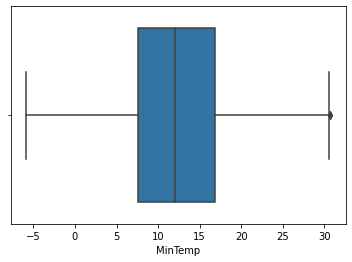

In [59]:
x = 'MinTemp'
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])



# MaxTemp

lower:  2.0 upper:  44.0
Actual Mean: 23.254762397505228


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxTemp'>

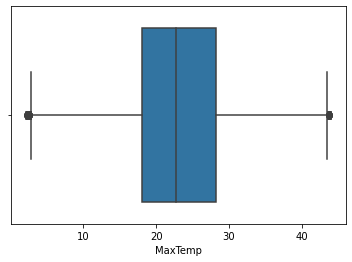

In [60]:
x  = "MaxTemp"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# Rainfall

lower:  -1.0 upper:  2.0
Actual Mean: 0.15513720264109077


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

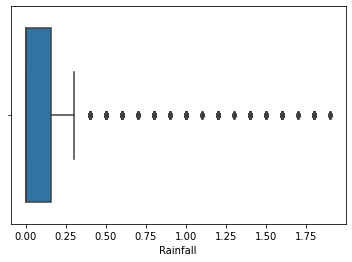

In [61]:
x = "Rainfall"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# WindGustSpeed

lower:  6.0 upper:  74.0
Actual Mean: 39.13886094560087


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

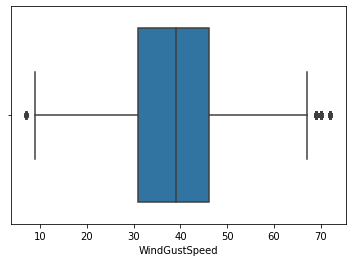

In [62]:
x  = "WindGustSpeed"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])





# WindSpeed9am

lower:  -11.0 upper:  37.0
Actual Mean: 13.614141736162937


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed9am'>

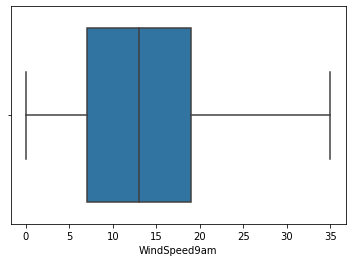

In [63]:
x  = "WindSpeed9am"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# WindSpeed3pm

lower:  -4.0 upper:  40.0
Actual Mean: 18.152051002679702


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed3pm'>

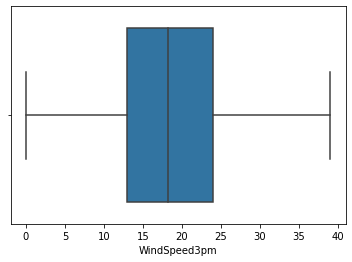

In [64]:
x  = "WindSpeed3pm"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# Humidity9am

lower:  18.0 upper:  122.0
Actual Mean: 69.40253597957289


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity9am'>

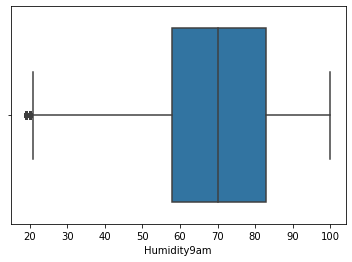

In [65]:
x  = "Humidity9am"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# Humidity3pm

lower:  -6.0 upper:  110.0
Actual Mean: 51.44928834695453


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity3pm'>

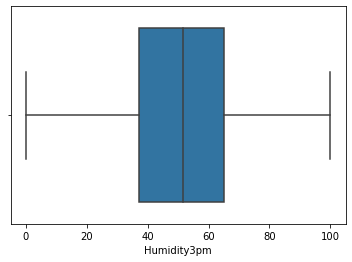

In [66]:
x  = "Humidity3pm"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])





# Pressure9am

lower:  999.0 upper:  1036.0
Actual Mean: 1017.747708495851


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure9am'>

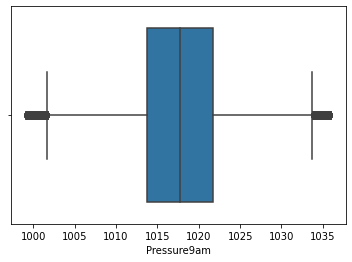

In [67]:
x  = "Pressure9am"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# Pressure3pm

lower:  996.0 upper:  1034.0
Actual Mean: 1015.3120981887313


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure3pm'>

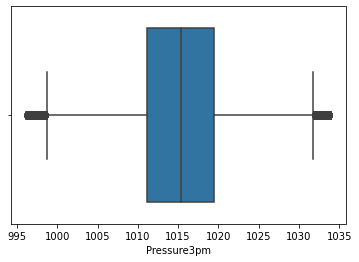

In [68]:
x  = "Pressure3pm"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])




# Cloud9am

lower:  -8.0 upper:  16.0
Actual Mean: 4.431160817585808


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud9am'>

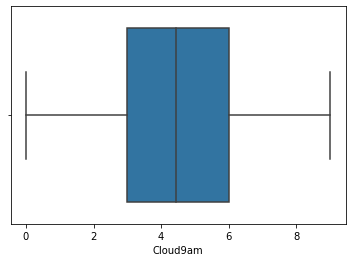

In [69]:
x  = "Cloud9am"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])

# Cloud3pm

lower:  -6.0 upper:  14.0
Actual Mean: 4.499250233195188


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud3pm'>

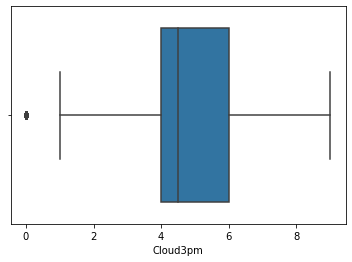

In [70]:
x  = "Cloud3pm"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])

# Temp9am

lower:  -2.0 upper:  36.0
Actual Mean: 16.998581575487336


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp9am'>

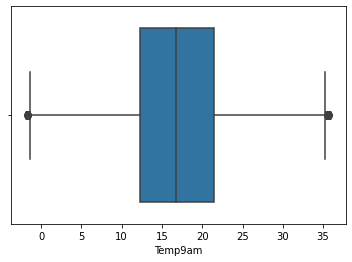

In [71]:
x  = "Temp9am"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])

# Temp3pm

lower:  2.0 upper:  41.0
Actual Mean: 21.692695631929286


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp3pm'>

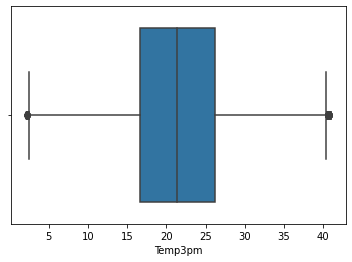

In [72]:
x  = "Temp3pm"
lower, upper = findIQR(df[df[x].isna()==False][x])
print("lower: ",lower,"upper: ",upper)
mean= avgvalue(df[df[x].isna()==False],x,lower,upper)
print("Actual Mean:",mean)
df[x].fillna(mean,inplace = True)
df[x] = df[x].apply(filloutlier,args=[lower,upper,mean])
sns.boxplot(df[x])

In [73]:
df.dropna(subset= ['RainToday'], inplace =True)
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

## WindGustDir

In [74]:
def nanfill(col,mod):
  if type(col)  ==  type(float('nan')):
      return mod
  return col


def convertToString(col):
  if type(col)!=type('str'):
      return col.to_string()
  return col
  

In [75]:

mode = df[df['WindGustDir'].isna()==False]['WindGustDir'].mode()
df['WindGustDir'].fillna(mode, inplace = True)
df['WindGustDir'] = df['WindGustDir'].apply(nanfill,args=[mode])
df['WindGustDir'] = df['WindGustDir'].apply(convertToString) 

In [76]:
def changeToCorrect(col):
    if col=='0    E':
        return 'E'
    elif col=='0    W':
        return 'W'
    return col

In [77]:
df['WindGustDir'] = df['WindGustDir'].apply(changeToCorrect) 

In [78]:
x = df['WindGustDir'].unique()

In [79]:
x

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

## WindDir9am

In [80]:
def changeToCorrect(col):
    if col=='0    E':
        return 'E'
    elif col=='0    W':
        return 'W'
    elif col=='0    N':
        return 'N'
    return col

def nanfill(col,mod):
  if type(col)  ==  type(float('nan')):
      return mod
  return col

In [81]:

mod = df[df['WindDir9am'].isna()==False]['WindDir9am'].mode()
df['WindDir9am'] = df['WindDir9am'].apply(nanfill,args = [mod,]) 
df['WindDir9am']   = df['WindDir9am'].apply(convertToString)
df['WindDir9am'].fillna(mod,inplace=True)

df['WindDir9am'] = df['WindDir9am'].apply(changeToCorrect) 

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

## WindDir3pm

In [82]:
def changeToCorrect(col):
    if col=='0    SE':
        return 'SE'
    elif col=='0    W':
        return 'W'
    return col
df['WindDir3pm'] = df['WindDir3pm'].apply(changeToCorrect)
df['WindDir3pm'].unique()


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [83]:

mod = df[df['WindDir3pm'].isna()==False]['WindDir3pm'].mode()
df['WindDir3pm'] = df['WindDir3pm'].apply(nanfill,args = [mod,]) 
df['WindDir3pm']   = df['WindDir3pm'].apply(convertToString)
df['WindDir3pm'].fillna(mod,inplace=True)

df['WindDir3pm'] = df['WindDir3pm'].apply(changeToCorrect) 

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

# Label Encoding

In [84]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,No,No
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,No,No


In [85]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [86]:
lb = preprocessing.LabelEncoder()

In [87]:
df['RainTomorrow'] = lb.fit_transform(df['RainTomorrow'])
## Yes - 1
## NO - 0


In [88]:
df['RainToday'] = lb.fit_transform(df['RainToday'])
## Yes - 1
## NO - 0


In [89]:
x = df['WindGustDir'].unique()
df['WindGustDir'] = lb.fit_transform(df['WindGustDir'])


In [90]:
x

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [91]:
windGustDir_key = {}
for i in x:
  windGustDir_key[i] = lb.transform(np.array(i, ndmin= 1))[0]


In [92]:
windGustDir_key

{'W': 13,
 'WNW': 14,
 'WSW': 15,
 'NE': 4,
 'NNW': 6,
 'N': 3,
 'NNE': 5,
 'SW': 12,
 'ENE': 1,
 'SSE': 10,
 'S': 8,
 'NW': 7,
 'SE': 9,
 'ESE': 2,
 'E': 0,
 'SSW': 11}

In [93]:
x = df['WindDir9am'].unique()
df['WindDir9am'] = lb.fit_transform(df['WindDir9am'])
WindDir9am_key = {}
for i in x:
  WindDir9am_key[i] = lb.transform(np.array(i, ndmin= 1))[0]
WindDir9am_key


{'W': 13,
 'NNW': 6,
 'SE': 9,
 'ENE': 1,
 'SW': 12,
 'SSE': 10,
 'S': 8,
 'NE': 4,
 'SSW': 11,
 'N': 3,
 'WSW': 15,
 'ESE': 2,
 'E': 0,
 'NW': 7,
 'WNW': 14,
 'NNE': 5}

In [94]:
x = df['WindDir3pm'].unique()
df['WindDir3pm'] = lb.fit_transform(df['WindDir3pm'])
WindDir3pm_key = {}
for i in x:
  WindDir3pm_key[i] = lb.transform(np.array(i, ndmin= 1))[0]
WindDir3pm_key


{'WNW': 14,
 'WSW': 15,
 'E': 0,
 'NW': 7,
 'W': 13,
 'SSE': 10,
 'ESE': 2,
 'ENE': 1,
 'NNW': 6,
 'SSW': 11,
 'SW': 12,
 'SE': 9,
 'N': 3,
 'S': 8,
 'NNE': 5,
 'NE': 4}

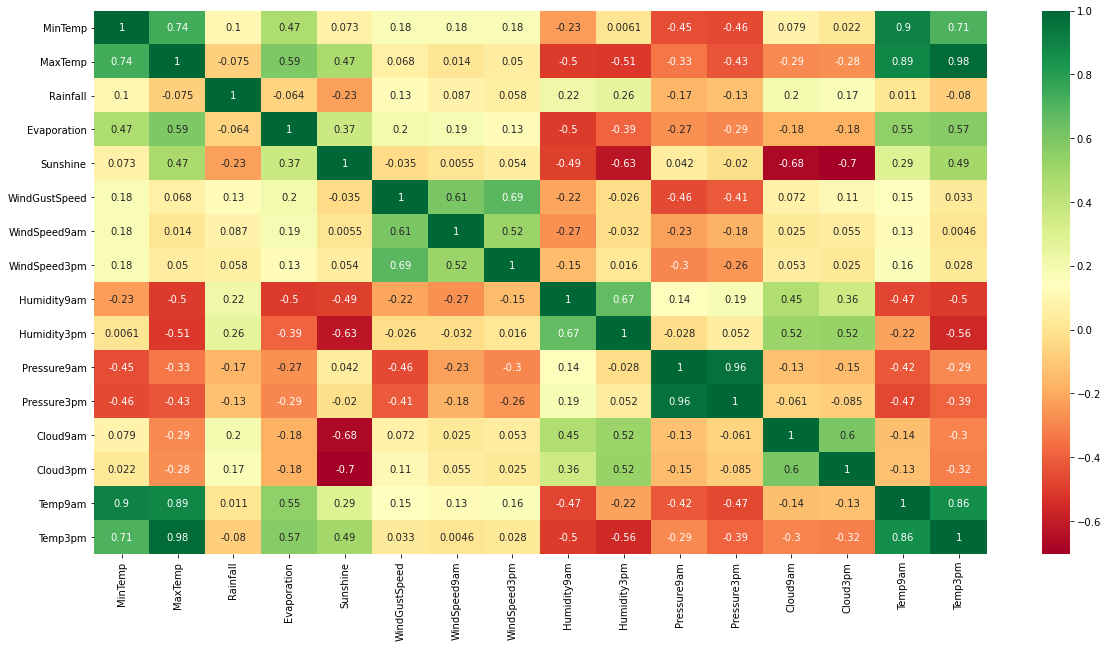

In [11]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

# Train test split

In [95]:

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0
145455,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0
145456,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0
145457,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0


In [96]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=30)

In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((94327, 18), (46460, 18), (94327,), (46460,))

# Model Creation

In [114]:
clf = DecisionTreeClassifier()

In [115]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
y_pred =clf.predict(x_test)

In [117]:
accuracy_score(y_test,y_pred)

0.7836203185535945

In [118]:
confusion_matrix(y_test,y_pred)

array([[30847,  5246],
       [ 4807,  5560]], dtype=int64)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     36093
           1       0.51      0.54      0.53     10367

    accuracy                           0.78     46460
   macro avg       0.69      0.70      0.69     46460
weighted avg       0.79      0.78      0.79     46460



## Random Forest

In [103]:
random_forest = RandomForestClassifier(n_estimators = 40)

In [104]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [105]:
y_pred= random_forest.predict(x_test)

In [106]:
file=open("model.pkl","wb")
pickle.dump(random_forest,file)
file.close()

In [107]:
accuracy_score(y_test,y_pred)


0.8490744726646577

In [108]:
confusion_matrix(y_test,y_pred)

array([[34417,  1676],
       [ 5336,  5031]], dtype=int64)

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     36093
           1       0.75      0.49      0.59     10367

    accuracy                           0.85     46460
   macro avg       0.81      0.72      0.75     46460
weighted avg       0.84      0.85      0.84     46460



## Normalize

In [121]:
df1 = copy.deepcopy(df)

In [122]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [123]:
fec = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [124]:
scaler = preprocessing.MinMaxScaler()

In [125]:
df1 = scaler.fit_transform(df1[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']])

In [126]:
df1 = pd.DataFrame(df1, columns=fec)

In [127]:
df1[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']] = df[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]

In [128]:
df1

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.527322,0.497608,0.315789,0.569231,0.571429,0.615385,0.641975,0.22,0.233696,0.291005,0.888889,0.499917,0.497354,0.507732,13.0,13.0,14.0,0.0,0.0
1,0.363388,0.550239,0.000000,0.569231,0.114286,0.564103,0.308642,0.25,0.312500,0.309524,0.492351,0.499917,0.505291,0.572165,14.0,6.0,15.0,0.0,0.0
2,0.513661,0.564593,0.000000,0.600000,0.542857,0.666667,0.234568,0.30,0.230978,0.333333,0.492351,0.222222,0.605820,0.543814,15.0,13.0,15.0,0.0,0.0
3,0.412568,0.619617,0.000000,0.261538,0.314286,0.230769,0.320988,0.16,0.502717,0.441799,0.492351,0.499917,0.529101,0.628866,4.0,9.0,0.0,0.0,0.0
4,0.639344,0.722488,0.526316,0.523077,0.200000,0.512821,0.777778,0.33,0.317935,0.261905,0.777778,0.888889,0.521164,0.711340,13.0,1.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.256831,0.471292,0.000000,0.369231,0.428571,0.333333,0.493827,0.27,0.695652,0.664021,0.492351,0.499917,0.298942,0.484536,0.0,2.0,2.0,0.0,0.0
140783,0.237705,0.509569,0.000000,0.369231,0.371429,0.282051,0.395062,0.24,0.692935,0.640212,0.492351,0.499917,0.317460,0.523196,0.0,0.0,1.0,0.0,0.0
140784,0.259563,0.555024,0.000000,0.230769,0.371429,0.230769,0.456790,0.21,0.663043,0.608466,0.492351,0.499917,0.338624,0.577320,2.0,0.0,7.0,0.0,0.0
140785,0.308743,0.593301,0.000000,0.461538,0.257143,0.230769,0.419753,0.24,0.595109,0.547619,0.492351,0.499917,0.380952,0.618557,9.0,4.0,14.0,0.0,0.0


## KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy_score(y_test,pred)


0.8424881618596642

## Logistic Regression

In [131]:
logistic = LogisticRegression().fit(x_train,y_train)
pred = logistic.predict(x_test)
print("Accuracy ",accuracy_score(y_test,pred))
print(classification_report(y_test,y_pred))

Accuracy  0.8367412828239346
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     36093
           1       0.51      0.54      0.53     10367

    accuracy                           0.78     46460
   macro avg       0.69      0.70      0.69     46460
weighted avg       0.79      0.78      0.79     46460



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [136]:
sv = svm.SVC()

In [137]:
sv.fit(x_train,y_train)

SVC()

In [138]:
pred = sv.predict(x_test)

In [139]:
accuracy_score(y_test,pred)

0.8337064141196728

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     36093
           1       0.51      0.54      0.53     10367

    accuracy                           0.78     46460
   macro avg       0.69      0.70      0.69     46460
weighted avg       0.79      0.78      0.79     46460

